In [9]:
import tensorflow as tf
from tensorflow import keras
from utoronto.edu.ca.data import Dataset
import utoronto.edu.ca.models as models
import utoronto.edu.ca.utils as utils
import utoronto.edu.ca.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import pytrec_eval
import numpy as np
import seaborn as sns
import  metrics_eval
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext tensorboard


In [2]:
yelp_cities = [#'atlanta',
#                'austin',
#                'boston',
               'columbus',
               'orlando',
#                'portland',
               'toronto'
]

In [3]:
predictions = {}
ground_truth = {}
for city in yelp_cities:
    # Load data
    dataset = Dataset(city)
    ground_truth[city] = dataset.y_test
    # Create the model
    model = models.get_model(dataset.max_len, dataset.num_labels, tpu=False)
    file_name = 'models/saved_weights_' + dataset.dataset + '.h5'
    model.load_weights(file_name)
    preds = model.predict(dataset.X_test, verbose=1, batch_size=128)
    predictions[city] = preds


Data in:  /home/reda/.keras/datasets/Columbus_reviews.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198099/198099 [01:14<00:00, 2667.03it/s]
2021-10-17 15:14:15.573596: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-17 15:14:15.997336: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-10-17 15:14:15.997370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8806 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:65:

135/135 [==============================] - 194s 1s/step
Data in:  /home/reda/.keras/datasets/Orlando_reviews.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440949/440949 [02:45<00:00, 2659.87it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel f

308/308 [==============================] - 444s 1s/step
Data in:  /home/reda/.keras/datasets/Toronto_reviews.csv


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 402927/402927 [01:53<00:00, 3537.82it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel f

180/180 [==============================] - 261s 1s/step


In [10]:
data = pd.DataFrame(columns=['City','Precision', 'Recall', 'F1-Score', 'Accuracy', 'MRR', 
                             'HR@5', 'HR@10', 'HR@20'])
for city in predictions.keys():
    y_true = ground_truth[city]
    y_pred = predictions[city]
    performance = metrics.get_performance(y_true, y_pred)
    data = data.append(pd.DataFrame([[performance['Precision'],
                                      performance['Recall'],
                                      performance['F1-Score'],
                                      performance['Accuracy'],
                                      performance['MRR'],
                                      performance['HR@5'],
                                      performance['HR@10'],
                                      performance['HR@20']]],
                                    columns=['City','Precision', 'Recall', 'F1-Score', 'Accuracy', 'MRR', 
                                             'HR@5', 'HR@10', 'HR@20']),ignore_index=True)
    
    

/home/reda/PycharmProjects/WWW22_LMRec/python3.8_WWW22_LMRec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: can only concatenate str (not "int") to str

In [82]:
performance

{'Precision': 0.49893281285154034,
 'Recall': 0.4675475871703824,
 'F1-Score': 0.4672784657221058,
 'Accuracy': 0.4675475871703824,
 'MRR': 0.5604930172768744,
 'HR@1-20': [0.0,
  0.4675475871703824,
  0.5652831945980558,
  0.6133069445252926,
  0.6439257232667792,
  0.6653472262646254,
  0.6822283019966238,
  0.6960242156120845,
  0.7095872868036557,
  0.7208801443623029,
  0.7300774201059433,
  0.7375283776704116,
  0.7448047034169626,
  0.7514989231037895,
  0.7580767215786717,
  0.7638395715699401,
  0.7689038942895395,
  0.7730368473135806,
  0.778799697304849,
  0.7843879154782001]}

In [ ]:
data


In [28]:
precision_score = metrics.precision_score(dataset.y_test, np.argmax(preds, axis=1), average='weighted')
recall_score = metrics.recall_score(dataset.y_test, np.argmax(preds, axis=1), average='weighted')
f1_score = metrics.f1_score(dataset.y_test, np.argmax(preds, axis=1), average='weighted')
top_k_accuracy_score = [metrics.top_k_accuracy_score(dataset.y_test, preds, k=k) for k in range(20)]
accuracy = metrics.accuracy_score(dataset.y_test, np.argmax(preds, axis=1))
mrr = metrics_eval.mrr(np.array([[x] for x in dataset.y_test]), np.argsort(-1*preds, axis=1))
metric_names = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'MRR']
metric_values = [precision_score, recall_score, f1_score, accuracy, mrr]


/home/reda/PycharmProjects/WWW22_LMRec/python3.8_WWW22_LMRec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
data = pd.DataFrame(columns=['metric','value'])
data_list = list(zip(metric_names, metric_values))

data = data.append(pd.DataFrame(data_list, columns=['metric','value']),ignore_index=True)
data

,metric,value
0,Precision,0.498933
1,Recall,0.467548
2,F1-Score,0.467278
3,Accuracy,0.467548
4,MRR,0.560493


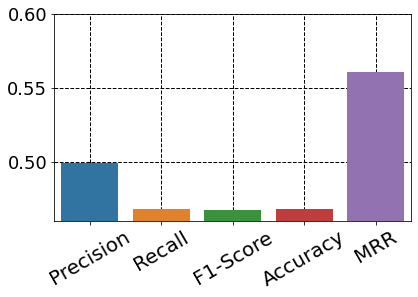

In [30]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(6.4, 3.8))

ax = sns.barplot(x="metric", y="value", data=data, ci=95, capsize=.2)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.46, 0.6)
plt.xticks(rotation=30)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()


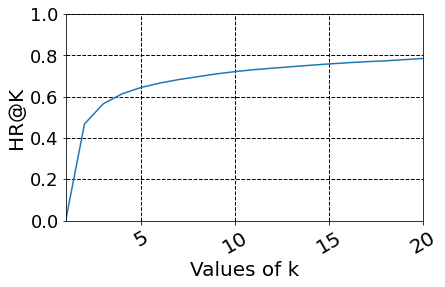

In [31]:
plt.figure(figsize=(6.4, 3.8))
plt.plot([x for x in range(1 , len(top_k_accuracy_score)+1)], top_k_accuracy_score)
plt.grid(color='black', linestyle='--', linewidth=1)
# plt.set_axisbelow(True)

plt.xlabel("Values of k")
plt.ylabel("HR@K")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0, 1)
plt.xlim(1, 20)
plt.xticks(rotation=30)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()


# Category-based performance

In [32]:
# Prepare the qrels
qrel= {}
with tqdm(total=len(preds)) as pbar:
    for i in range(len(dataset.y_test)):
        r = {}
        business_id = dataset.labels[dataset.y_test[i]]
        categories1 = dataset.business_to_categories[business_id]
            
        for business_id in dataset.labels:
            categories2 = dataset.business_to_categories[business_id]
            if len(categories1.intersection(categories2)) != 0:
                r[business_id] = int(1)
        qrel['r'+str(i)] = r
        pbar.update(1)      




100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17179/17179 [00:06<00:00, 2488.17it/s]


In [33]:
# Prepare the results
run = {}
with tqdm(total=len(preds)) as pbar:
    for i in range(len(preds)):
        rec = preds[i]  
        r = {}
        for j in range(len(rec)):
            p = rec[j]
            business_id = dataset.labels[j]
            r[business_id] = float(p)
        run['r'+str(i)] = r            
        
        pbar.update(1)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17179/17179 [00:06<00:00, 2544.64it/s]


In [34]:
evaluator = pytrec_eval.RelevanceEvaluator(qrel, {'map','P', 'recall', 'ndcg', 'recip_rank', 'Rprec',
                                                 'success_1', 'success_5', 'success_10',
                                                 'num_q','num_rel','num_rel_ret','num_ret'})
res = evaluator.evaluate(run)


In [35]:
# Averaging
out = {}
for k in res:
    for m in res[k]:
        out[m] = 0
for k in res:
    for m in res[k]:
        if m not in ['num_q','num_rel','num_rel_ret','num_ret']:
            out[m] = out[m] + (res[k][m] / len(res))
        else:
            out[m] = int(out[m] + res[k][m])


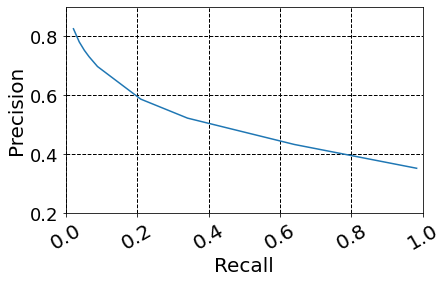

In [43]:
# Averaging
y = [out['P_5'], out['P_10'], out['P_15'], out['P_20'], 
     out['P_30'], out['P_100'], out['P_200'], out['P_500'], out['P_1000'], ]

x = [out['recall_5'], out['recall_10'], out['recall_15'], out['recall_20'], 
     out['recall_30'], out['recall_100'], out['recall_200'], out['recall_500'], out['recall_1000'], ]

plt.figure(figsize=(6.4, 3.8))
plt.plot(x, y)
plt.grid(color='black', linestyle='--', linewidth=1)
# plt.set_axisbelow(True)

plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.2, 0.9)
plt.xlim(0., 1)
plt.xticks(rotation=30)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

for k in res:
    for m in res[k]:
        out[m] = 0
for k in res:
    for m in res[k]:
        if m not in ['num_q','num_rel','num_rel_ret','num_ret']:
            out[m] = out[m] + (res[k][m] / len(res))
        else:
            out[m] = int(out[m] + res[k][m])


In [51]:
data_list2

[('num_q', 17179),
 ('num_ret', 17831802),
 ('num_rel', 6181634),
 ('num_rel_ret', 6181634),
 ('map', 0.5276244396914725),
 ('Rprec', 0.4963272958741358),
 ('recip_rank', 0.9339682230997245),
 ('P_5', 0.8254147505676146),
 ('P_10', 0.7809011001804387),
 ('P_15', 0.7522750645168021),
 ('P_20', 0.7307031841201657),
 ('P_30', 0.6976056037409972),
 ('P_100', 0.5870289306711771),
 ('P_200', 0.522666627859598),
 ('P_500', 0.4334988066825797),
 ('P_1000', 0.3527675068397451),
 ('recall_5', 0.021731734552552208),
 ('recall_10', 0.03792810621620064),
 ('recall_15', 0.0523312698484717),
 ('recall_20', 0.06550499820059043),
 ('recall_30', 0.08900063444534466),
 ('recall_100', 0.2101562768089297),
 ('recall_200', 0.34114454527151317),
 ('recall_500', 0.6398915809399848),
 ('recall_1000', 0.9826435387030246),
 ('ndcg', 0.8712977703551694),
 ('success_1', 0.9042435531755474),
 ('success_5', 0.9718260667095524),
 ('success_10', 0.9835263985100132)]

In [45]:
data2 = pd.DataFrame(columns=['metric','value'])
data_list2 = list(zip(out.keys(), out.values()))

data2 = data2.append(pd.DataFrame(data_list2, columns=['metric','value']),ignore_index=True)
data2 = data2[~data2['metric'].isin(['num_q','num_ret','num_rel_ret','num_rel',
                                     'P_5', 'P_10', 'P_15', 'P_20', 
                                     'P_30', 'P_100', 'P_200', 'P_500', 'P_1000',
                                     'recall_5', 'recall_10', 'recall_15', 'recall_20', 
                                     'recall_30', 'recall_100', 'recall_200', 'recall_500', 'recall_1000'])]
data2

,metric,value
4,map,0.527624
5,Rprec,0.496327
6,recip_rank,0.933968
25,ndcg,0.871298
26,success_1,0.904244
27,success_5,0.971826
28,success_10,0.983526


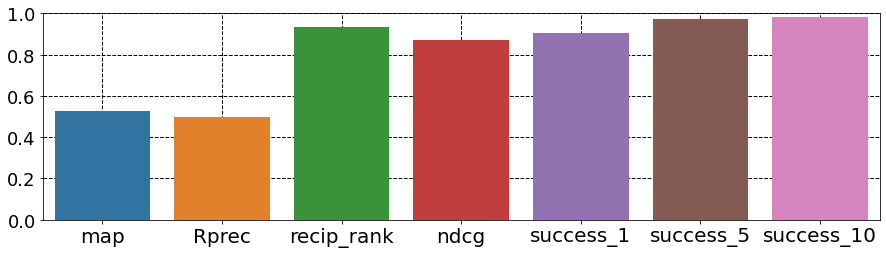

In [46]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(15, 3.8))

ax = sns.barplot(x="metric", y="value", data=data2, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0, 1)
# plt.xticks(rotation=30)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()
